In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

#checking library versions
print("Numpy -> " + np.__version__)
print("Pandas -> " + pd.__version__)
print("Tensorflow -> " + tf.__version__)
print("Keras -> " + keras.__version__)

Numpy -> 1.20.1
Pandas -> 1.2.4
Tensorflow -> 2.3.0
Keras -> 2.4.0


In [2]:
cwd = os.getcwd()
cwd

'C:\\Users\\migot\\Desktop\\DriveAI'

In [ ]:
tf.test.is_built_with_cuda()

In [3]:
def load_images(name, path):
    img = Image.open(path + "/" + name)
    img = np.array(img)
    seg = img[:256, 256:]
    img = img[:256, 0:256]
    
    #return img, seg
    return img/255, seg/255

In [4]:
def create_dataset(train_path, test_path):
    train_img_dataset = []
    train_seg_dataset = []
    valid_img_dataset = []
    valid_seg_dataset = []
    #train dataset
    files = os.listdir(train_path)[0:2975]
    for file in files:
        X, y = load_images(file, train_path)
        train_img_dataset.append(X)
        train_seg_dataset.append(y)
    
    #validation/test dataset
    files = os.listdir(test_path)[0:500]
    for file in files:
        X, y = load_images(file, train_path)
        valid_img_dataset.append(X)
        valid_seg_dataset.append(y)
    
    return train_img_dataset, train_seg_dataset, valid_img_dataset, valid_seg_dataset

In [5]:
train_path = cwd + "/data/train"
test_path = cwd + "/data/val"


X_train, y_train, X_valid, y_valid = create_dataset(train_path, test_path)

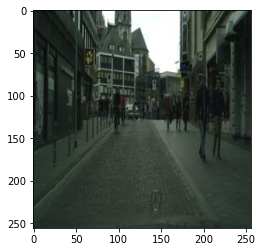

In [6]:
plt.imshow(X_train[1000])
plt.show()

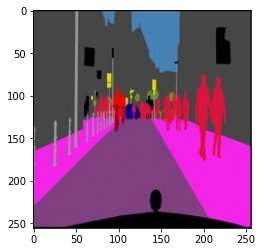

In [7]:
plt.imshow(y_train[1000])
plt.show()

In [8]:
def unet(input_size=(256, 256, 3)):
    inputs = keras.layers.Input(input_size)
    
    x1 = keras.layers.Conv2D(64, (3, 3), padding="same")(inputs)
    bn1 = keras.layers.Activation("relu")(x1)
    x1 = keras.layers.Conv2D(64, (3, 3), padding="same")(bn1)
    bn1 = keras.layers.BatchNormalization()(x1)
    bn1 = keras.layers.Activation("relu")(bn1)
    pool1 = keras.layers.MaxPooling2D()(bn1)
    
    x2 = keras.layers.Conv2D(128, (3, 3), padding="same")(pool1)
    bn2 = keras.layers.Activation("relu")(x2)
    x2 = keras.layers.Conv2D(128, (3, 3), padding="same")(bn2)
    bn2 = keras.layers.BatchNormalization()(x2)
    bn2 = keras.layers.Activation("relu")(bn2)
    pool2 = keras.layers.MaxPooling2D()(bn2)
    
    x3 = keras.layers.Conv2D(256, (3, 3), padding="same")(pool2)
    bn3 = keras.layers.Activation("relu")(x3)
    x3 = keras.layers.Conv2D(256, (3, 3), padding="same")(bn3)
    bn3 = keras.layers.BatchNormalization()(x3)
    bn3 = keras.layers.Activation("relu")(bn3)
    pool3 = keras.layers.MaxPooling2D()(bn3)
    
    x4 = keras.layers.Conv2D(512, (3, 3), padding="same")(pool3)
    bn4 = keras.layers.Activation("relu")(x4)
    x4 = keras.layers.Conv2D(512, (3, 3), padding="same")(bn4)
    bn4 = keras.layers.BatchNormalization()(x4)
    bn4 = keras.layers.Activation("relu")(bn4)
    pool4 = keras.layers.MaxPooling2D()(bn4)
    
    x5 = keras.layers.Conv2D(1024, (3, 3), padding="same")(pool4)
    bn5 = keras.layers.Activation("relu")(x5)
    x5 = keras.layers.Conv2D(1024, (3, 3), padding="same")(bn5)
    bn5 = keras.layers.BatchNormalization()(x5)
    bn5 = keras.layers.Activation("relu")(bn5)
    
    up6 = keras.layers.concatenate([
        keras.layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding="same")(bn5),
        x4])
    x6 = keras.layers.Conv2D(512, (3, 3), padding="same")(up6)
    bn6 = keras.layers.Activation("relu")(x6)
    x6 = keras.layers.Conv2D(512, (3, 3), padding="same")(bn6)
    bn6 = keras.layers.BatchNormalization()(x6)
    bn6 = keras.layers.Activation("relu")(bn6)
    
    up7 = keras.layers.concatenate([
        keras.layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding="same")(bn6),
        x3])
    x7 = keras.layers.Conv2D(256, (3, 3), padding="same")(up7)
    bn7 = keras.layers.Activation("relu")(x7)
    x7 = keras.layers.Conv2D(256, (3, 3), padding="same")(bn7)
    bn7 = keras.layers.BatchNormalization()(x7)
    bn7 = keras.layers.Activation("relu")(bn7)
    
    up8 = keras.layers.concatenate([
        keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding="same")(bn7),
        x2])
    x8 = keras.layers.Conv2D(128, (3, 3), padding="same")(up8)
    bn8 = keras.layers.Activation("relu")(x8)
    x8 = keras.layers.Conv2D(128, (3, 3), padding="same")(bn8)
    bn8 = keras.layers.BatchNormalization()(x8)
    bn8 = keras.layers.Activation("relu")(bn8)
    
    up9 = keras.layers.concatenate([
        keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding="same")(bn8),
        x1])
    x9 = keras.layers.Conv2D(64, (3, 3), padding="same")(up9)
    bn9 = keras.layers.Activation("relu")(x9)
    x9 = keras.layers.Conv2D(64, (3, 3), padding="same")(bn9)
    bn9 = keras.layers.BatchNormalization()(x9)
    bn9 = keras.layers.Activation("relu")(bn9)
    
    x10 = keras.layers.Conv2D(13, (1, 1), activation="sigmoid")(bn9)
    
    return keras.Model(inputs=[inputs], outputs=[x10])

In [9]:
model = unet()
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 64) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 36928       activation[0][0]                 
_______________________________________________________________________________________

In [ ]:
clb = [keras.callbacks.ModelCheckpoint("model.h5", save_best_only=True)]
h = model.fit(X_train, y_train, epochs=1000, validation_data=(X_valid, y_valid), validation_steps=10, steps_per_epoch=10, callbacks=clb, verbose=2)